In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [48]:
data=pd.read_csv("train_dataset.csv")
data.head()

,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items,fraud_flag
0,79815,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,22598,BEDROOM FURNITURE,BEDROOM FURNITURE,SERVICE,SERVICE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
2,63665,LIVING DINING FURNITURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,31312,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,30742,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


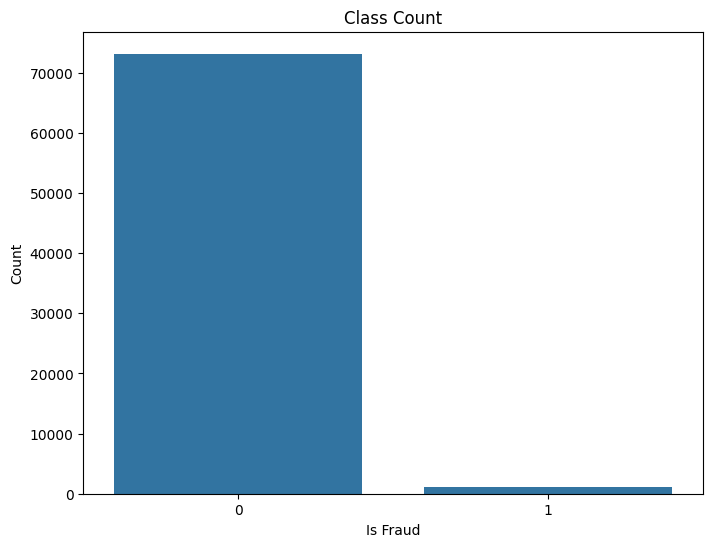

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="fraud_flag")
plt.title("Class Count")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

In [50]:
data.dtypes

ID                         int64
item1                     object
item2                     object
item3                     object
item4                     object
                          ...   
Nbr_of_prod_purchas22    float64
Nbr_of_prod_purchas23    float64
Nbr_of_prod_purchas24    float64
Nb_of_items                int64
fraud_flag                 int64
Length: 147, dtype: object

In [51]:
data.describe()

,ID,cash_price1,cash_price2,cash_price3,cash_price4,cash_price5,cash_price6,cash_price7,cash_price8,cash_price9,...,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items,fraud_flag
count,74230.000000,74230.000000,35779.000000,10311.000000,3676.000000,1742.000000,1079.000000,762.000000,589.000000,456.000000,...,112.000000,93.000000,78.000000,69.000000,57.000000,46.000000,36.000000,30.000000,74230.000000,74230.000000
mean,58094.022349,1093.182258,192.960619,192.004655,173.660773,193.319747,153.879518,146.220472,133.050934,133.291667,...,1.508929,1.451613,1.371795,1.362319,1.245614,1.434783,1.166667,1.466667,1.766025,0.014199
std,33461.682129,711.608497,395.772676,372.257966,320.183091,374.577832,269.967768,295.830564,266.731796,263.692846,...,1.576834,1.868015,1.117848,0.969703,0.575720,1.046734,0.560612,1.306043,1.465902,0.118312
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,29074.500000,649.000000,7.000000,7.000000,8.750000,16.000000,15.000000,20.000000,15.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,58224.500000,949.000000,40.000000,44.000000,48.000000,57.500000,50.000000,50.000000,45.000000,45.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,87141.500000,1349.000000,140.000000,185.000000,183.250000,199.000000,175.000000,140.000000,125.000000,126.750000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.750000,1.000000,1.750000,2.000000,0.000000
max,115985.000000,21995.000000,5499.000000,5999.000000,5198.000000,4249.000000,2849.000000,4198.000000,2999.000000,2399.000000,...,12.000000,16.000000,6.000000,7.000000,4.000000,7.000000,4.000000,8.000000,60.000000,1.000000


In [52]:
data.isnull().sum()

ID                           0
item1                        0
item2                    38451
item3                    63919
item4                    70554
                         ...  
Nbr_of_prod_purchas22    74184
Nbr_of_prod_purchas23    74194
Nbr_of_prod_purchas24    74200
Nb_of_items                  0
fraud_flag                   0
Length: 147, dtype: int64

In [53]:
data.columns

Index(['ID', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7',
       'item8', 'item9',
       ...
       'Nbr_of_prod_purchas17', 'Nbr_of_prod_purchas18',
       'Nbr_of_prod_purchas19', 'Nbr_of_prod_purchas20',
       'Nbr_of_prod_purchas21', 'Nbr_of_prod_purchas22',
       'Nbr_of_prod_purchas23', 'Nbr_of_prod_purchas24', 'Nb_of_items',
       'fraud_flag'],
      dtype='object', length=147)

In [54]:
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('submission_data_x.csv')

In [55]:
print("Training Dataset Shape:", train_df.shape)

Training Dataset Shape: (74230, 147)


In [56]:
print("Test Dataset Shape:", test_df.shape)

Test Dataset Shape: (18558, 146)


In [57]:
print("Train Columns:", train_df.columns)

Train Columns: Index(['ID', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7',
       'item8', 'item9',
       ...
       'Nbr_of_prod_purchas17', 'Nbr_of_prod_purchas18',
       'Nbr_of_prod_purchas19', 'Nbr_of_prod_purchas20',
       'Nbr_of_prod_purchas21', 'Nbr_of_prod_purchas22',
       'Nbr_of_prod_purchas23', 'Nbr_of_prod_purchas24', 'Nb_of_items',
       'fraud_flag'],
      dtype='object', length=147)


In [11]:
print("Missing Values in Training Dataset:\n", train_df.isnull().sum())

Missing Values in Training Dataset:
 ID                           0
item1                        0
item2                    38451
item3                    63919
item4                    70554
                         ...  
Nbr_of_prod_purchas22    74184
Nbr_of_prod_purchas23    74194
Nbr_of_prod_purchas24    74200
Nb_of_items                  0
fraud_flag                   0
Length: 147, dtype: int64


In [58]:
# Tüm kategorik değişkenleri string e dönüştürün
categorical_features = train_df.select_dtypes(include=['object']).columns

train_df[categorical_features] = train_df[categorical_features].astype(str)

test_df[categorical_features] = test_df[categorical_features].astype(str)

In [59]:
X = train_df.drop(columns=['fraud_flag'])
y = train_df['fraud_flag']

In [60]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [61]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Modeli Tanımla
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', xgb.XGBClassifier(random_state=42))])

In [65]:
# Modeli eğit
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'cash_price1', 'cash_price2', 'cash_price3', 'cash_price4',
       'cash_price5', 'cash_price6', 'cash_price7', 'cash_price8',
       'cash_price9', 'cash_price10', 'cash_price11', 'cash_price12',
       'cash_price13', 'cash_p...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [66]:
# Test verisi üzerinde tahmin etme
test_pred_proba = model.predict_proba(test_df)[:, 1]

In [67]:
sample_submission = pd.read_csv('sample_submission.csv')

In [68]:
sample_submission["fraud_flag"]=test_pred_proba

In [69]:
sample_submission.to_csv("sample_submission.csv", index=False)